# Initial set up

In [83]:
# Import dependencies 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [84]:
# reading csv file
csvpath = os.path.join('.', 'Datasets', 'age_and_sex.csv')

with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    csv_header = next(csvreader)

In [85]:
# convert to a df
file_path = 'Datasets/age_and_sex.csv'
raw_data_df = pd.read_csv(file_path)
raw_data_df.head(15)

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
5,Medicaid,Dental Services,85+,Total,48,47,51,80,118,127,135,169,218,221
6,Medicaid,Dental Services,Total,Males,1563,1824,2043,2682,3639,3712,4254,5237,5569,5559
7,Medicaid,Dental Services,0-18,Males,1033,1285,1456,1865,2501,2497,2603,3088,3169,3125
8,Medicaid,Dental Services,19-44,Males,276,281,293,394,572,596,816,1043,1158,1174
9,Medicaid,Dental Services,45-64,Males,176,181,211,307,420,468,661,873,927,940


In [86]:
raw_data_df["Payer"].value_counts()

Payer
Medicare                     198
Other Payers and Programs    198
Out-of-Pocket                198
Total                        198
Medicaid                     180
Private health Insurance     180
Name: count, dtype: int64

In [87]:
total_df = raw_data_df[raw_data_df["Payer"] == "Total"]
total_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [88]:
persc_drugs = total_df[total_df["Service"] == "Prescription Drugs"]
persc_drugs

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1033,Total,Prescription Drugs,0-18,Males,7272,8555,9951,10489,10495,11050,11581,11390,10708,10919
1034,Total,Prescription Drugs,19-44,Males,13464,15726,18434,17630,20108,19110,23737,27274,28365,29360
1035,Total,Prescription Drugs,45-64,Males,28978,37034,43824,50364,48743,53212,59621,62206,63082,64177


In [89]:
persc_drugs[persc_drugs["Sex"] == "Total"]

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


# Dental services exploration and charting

In [91]:
dental_services_filtered = raw_data_df[raw_data_df["Service"] == "Dental Services"]

In [92]:
dental_total_removed = dental_services_filtered[dental_services_filtered["Payer"] != "Total"]

In [93]:
dental_total_age_removed = dental_total_removed[dental_total_removed["Age Group"] != "Total"]

In [94]:
dental_total_age_sex_removed = dental_total_age_removed[dental_total_age_removed["Sex"] == "Total"]

In [95]:
dental_total_age_sex_removed["Payer"].value_counts()

Payer
Medicaid                     5
Medicare                     5
Other Payers and Programs    5
Out-of-Pocket                5
Private health Insurance     5
Name: count, dtype: int64

In [96]:
medicaid = dental_total_age_sex_removed[dental_total_age_sex_removed["Payer"] == "Medicaid"]

In [97]:
medicaid

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
5,Medicaid,Dental Services,85+,Total,48,47,51,80,118,127,135,169,218,221


In [98]:
medicaid_df = medicaid.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
medicaid_df

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,45-64,433,440,515,733,974,1071,1543,1952,2088,2117
4,65-84,207,202,211,291,358,369,400,543,728,738
5,85+,48,47,51,80,118,127,135,169,218,221


In [99]:
# Set the index to 'Age Group' column for easier plotting
medicaid_reset_index_df = medicaid_df.set_index('Age Group', inplace=False)
medicaid_reset_index_df

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
45-64,433,440,515,733,974,1071,1543,1952,2088,2117
65-84,207,202,211,291,358,369,400,543,728,738
85+,48,47,51,80,118,127,135,169,218,221


In [100]:
# Rotate the df
medicaid_rotated_df = medicaid_reset_index_df.T
medicaid_rotated_df

Age Group,0-18,19-44,45-64,65-84,85+
2002,2085,937,433,207,48
2004,2591,984,440,202,47
2006,2938,1077,515,211,51
2008,3737,1405,733,291,80
2010,5012,1929,974,358,118
2012,4989,1938,1071,369,127
2014,5216,2480,1543,400,135
2016,6195,3029,1952,543,169
2018,6340,3270,2088,728,218
2020,6246,3315,2117,738,221


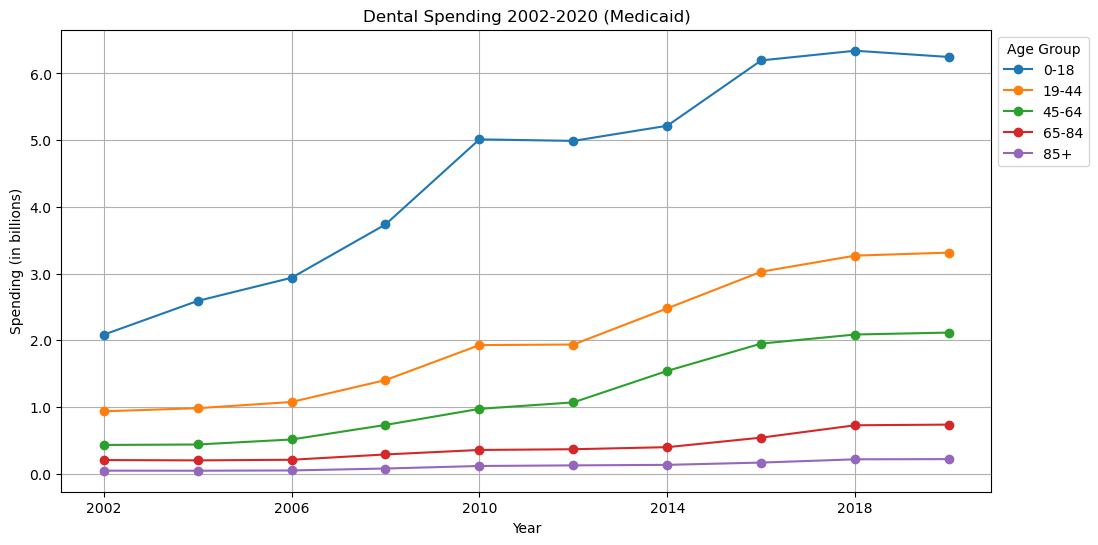

In [101]:
# charting
medicaid_rotated_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Dental Spending 2002-2020 (Medicaid)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Figures/medicaid_dental_spending.png")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))
plt.show()

# Dental spending by age group

In [103]:
dental_total = dental_services_filtered[dental_services_filtered["Payer"] == "Total"]
dental_total

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,Total,Dental Services,85+,Total,779,1092,1354,1940,1992,2192,2489,2568,3231,3372
96,Total,Dental Services,Total,Males,32525,36222,39970,45283,46589,47811,50791,56863,62504,62026
97,Total,Dental Services,0-18,Males,8790,10784,11705,13150,13031,13769,13615,16039,17453,17222
98,Total,Dental Services,19-44,Males,8666,9009,9079,10173,9998,9759,10790,12913,13039,13138
99,Total,Dental Services,45-64,Males,10503,10768,12608,14387,14813,14391,14735,14735,16223,14521


In [104]:
dental_tot_ages = dental_total[dental_total["Age Group"] != "Total"]

In [105]:
dental_total_filtered = dental_tot_ages[dental_tot_ages["Sex"] == "Total"]

In [106]:
dental_loc = dental_total_filtered.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
dental_loc

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
91,0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [107]:
dental_reset_index = dental_loc.set_index("Age Group", inplace=False)
dental_reset_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [108]:
dental_total_rotated = dental_reset_index.T
dental_total_rotated

Age Group,0-18,19-44,45-64,65-84,85+
2002,19093,20814,23759,9191,779
2004,22843,21996,25209,11051,1092
2006,25787,22659,28661,13304,1354
2008,28007,25224,32575,15016,1940
2010,28676,24490,33728,17013,1992
2012,30925,25225,31366,19993,2192
2014,30497,26693,32698,22316,2489
2016,33178,30148,34524,25779,2568
2018,33966,32340,37762,30090,3231
2020,33643,32316,37152,32832,3372


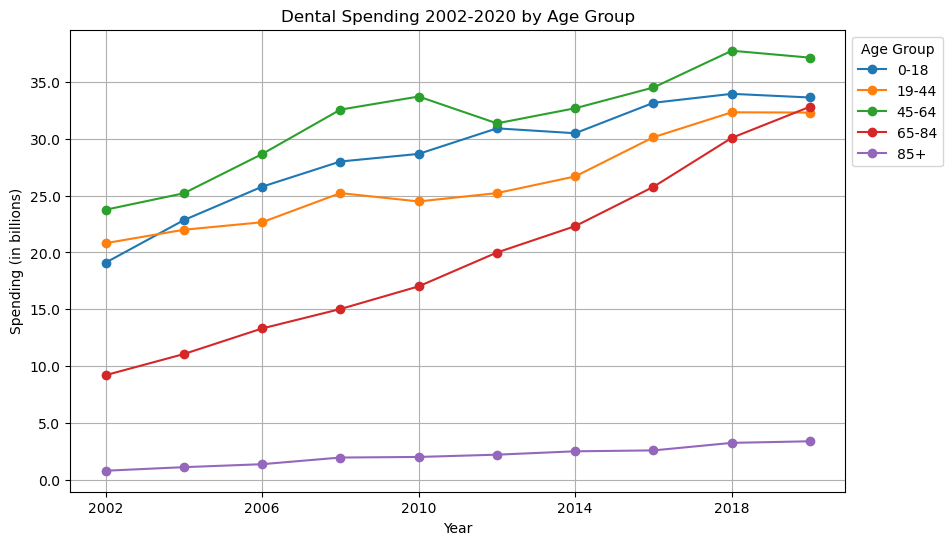

In [109]:
dental_total_rotated.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 by Age Group')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/dental_spending.png")
plt.show()

In [110]:
pvt_dent = dental_services_filtered[dental_services_filtered["Payer"] == "Private health Insurance"]
pvt_ageout = pvt_dent[pvt_dent["Age Group"] != "Total"]
pvt_df = pvt_ageout[pvt_ageout["Sex"] == "Total"]

In [111]:
pvt_dent_col = pvt_df.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
pvt_dent_col

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
73,0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
74,19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
75,45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
76,65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
77,85+,130,253,256,501,496,521,675,559,852,676


In [112]:
pvt_dent_total_index = pvt_dent_col.set_index("Age Group", inplace=False)
pvt_dent_total_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
85+,130,253,256,501,496,521,675,559,852,676


In [113]:
pvt_dent_total_rot = pvt_dent_total_index.T
pvt_dent_total_rot

Age Group,0-18,19-44,45-64,65-84,85+
2002,8588,11187,12159,2967,130
2004,10657,11893,12520,3662,253
2006,11683,12010,13814,3952,256
2008,12182,12545,15877,4172,501
2010,11914,12995,16941,5573,496
2012,14143,13393,14881,6667,521
2014,13395,14288,15953,8253,675
2016,13852,15337,16635,9225,559
2018,14118,16451,18605,10479,852
2020,12782,15454,16869,10413,676


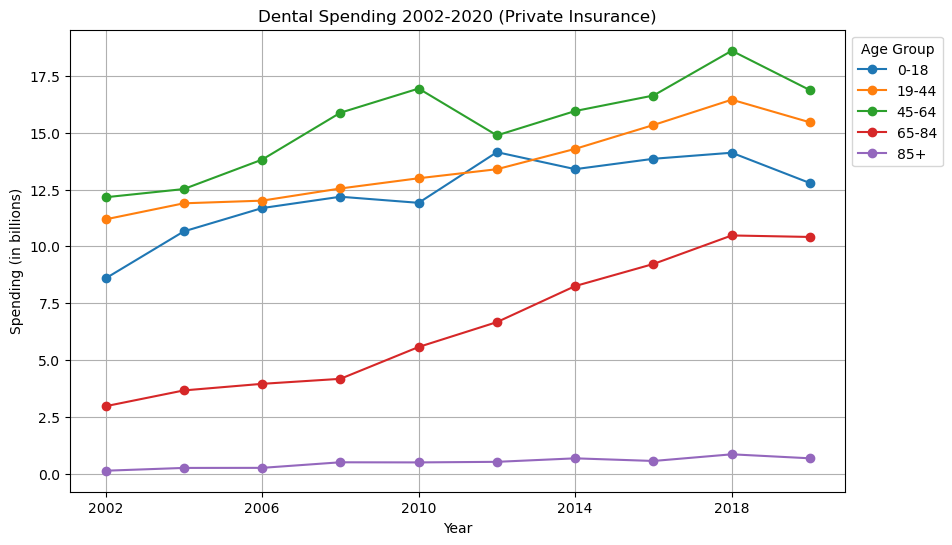

In [114]:
pvt_dent_total_rot.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 (Private Insurance)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)

ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/dental_spending_pvt.png")
plt.show()

# Perscription drug exploration and charting

In [116]:
pres_filtered_df = total_df[(total_df["Service"] == "Prescription Drugs") & (total_df["Age Group"] != "Total") & (total_df["Sex"] == "Total") & (total_df["Payer"] == "Total")]
pres_filtered_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [117]:
pres_columns_df = pres_filtered_df.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
pres_columns_df

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1027,0-18,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,19-44,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,45-64,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,65-84,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,85+,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [118]:
pres_indexreset_df = pres_columns_df.set_index("Age Group")
pres_indexreset_df

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
19-44,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
45-64,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
65-84,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
85+,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [119]:
pres_rotation_df = pres_indexreset_df.T
pres_rotation_df

Age Group,0-18,19-44,45-64,65-84,85+
2002,12801,37535,68711,35583,5181
2004,15350,43487,87408,42925,6467
2006,17813,49398,102013,50490,8385
2008,17783,46965,108211,61827,9539
2010,17985,48245,110997,65878,10267
2012,18847,47452,111382,69012,10304
2014,20090,53539,125759,79672,11581
2016,19792,61627,135138,84338,12429
2018,19028,64853,133603,93452,13234
2020,19587,70887,137530,107738,14887


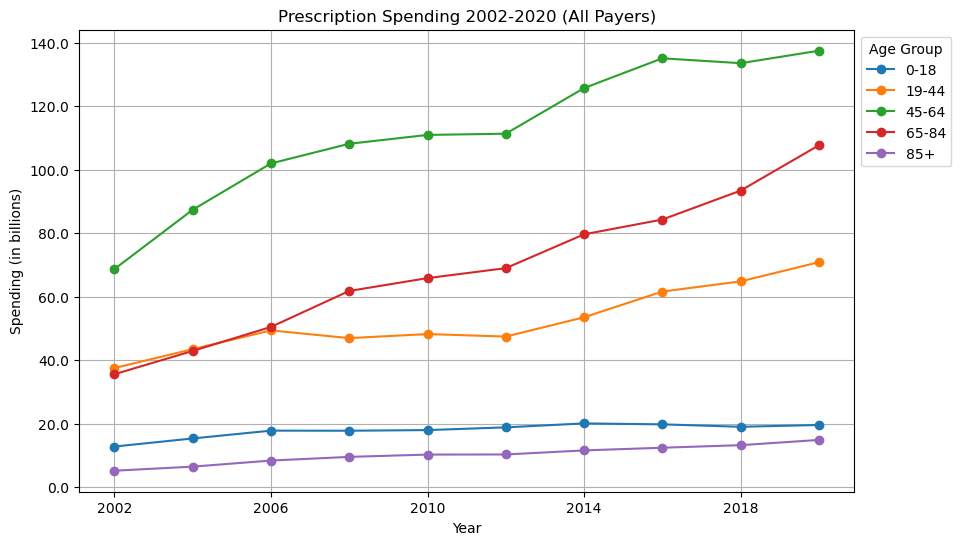

In [120]:
pres_rotation_df.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Prescription Spending 2002-2020 (All Payers)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/pres_spending.png")
plt.show()

In [121]:
persc_filtered = persc_drugs[(persc_drugs["Age Group"] == "Total") & (persc_drugs["Sex"] != "Total")]
persc_filtered

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Total,Prescription Drugs,Total,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [122]:
persc_col = persc_filtered.loc[:,["Sex", "2002", "2004","2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
persc_col

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [123]:
# reset index
persc_col_index = persc_col.set_index("Sex", inplace=False)

In [124]:
# rotate
persc_rotated = persc_col_index.T
persc_rotated

Sex,Males,Females
2002,64582,95231
2004,80145,115493
2006,94851,133248
2008,107670,136654
2010,110442,142930
2012,116898,140098
2014,134439,156203
2016,143278,170044
2018,150987,173183
2020,160536,190094


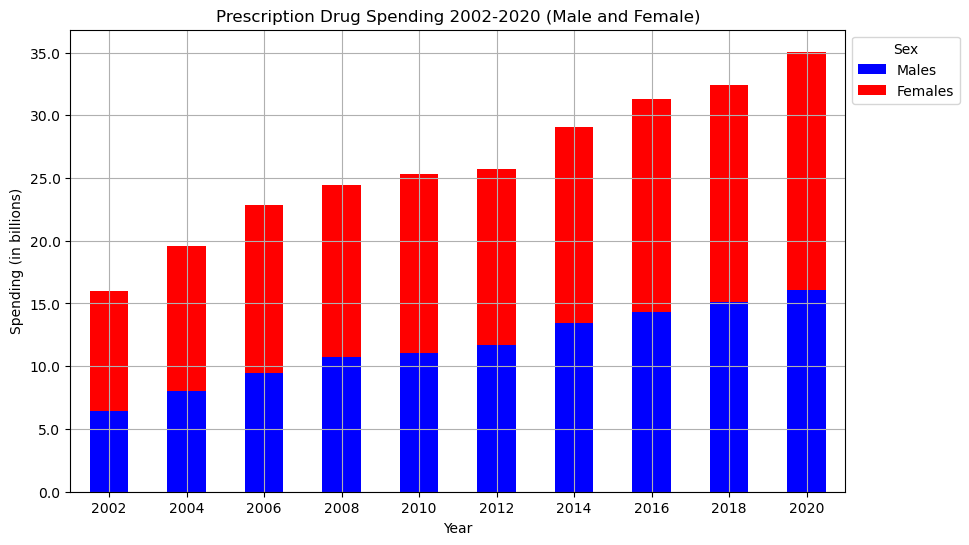

In [125]:
# Plotting the DataFrame as a stacked bar graph
persc_rotated.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Set the title and axis labels
plt.title('Prescription Drug Spending 2002-2020 (Male and Female)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')

# Add legend and adjust its position
plt.legend(title='Sex', bbox_to_anchor=(1, 1))

# Display grid lines
plt.grid(True)

# Set x-axis ticks to show every other value
plt.xticks(rotation=0, ha='center')

ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 10000)))

# Save the figure as a PNG file
plt.savefig("Figures/drug_spending_yoy_gender.png")

# Show the plot
plt.show()

# Perscription stat analysis

In [127]:
raw_data_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [128]:
pres_stat = raw_data_df[raw_data_df["Service"] == "Prescription Drugs"]
pres_stat

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
936,Medicaid,Prescription Drugs,Total,Total,27523,35852,19122,19242,20423,21049,25266,29328,30430,34419
937,Medicaid,Prescription Drugs,0-18,Total,4558,6155,5916,6062,6280,7118,7543,7741,7437,8419
938,Medicaid,Prescription Drugs,19-44,Total,7127,9038,5814,5803,6294,6437,8226,10239,10784,11868
939,Medicaid,Prescription Drugs,45-64,Total,8041,10870,6280,6348,6810,6336,8219,9186,9353,10166
940,Medicaid,Prescription Drugs,65-84,Total,6077,7718,935,865,861,921,1052,1596,2108,2977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Total,Prescription Drugs,0-18,Females,5530,6795,7863,7294,7490,7796,8509,8402,8321,8668
1040,Total,Prescription Drugs,19-44,Females,24071,27761,30965,29335,28137,28342,29802,34352,36488,41527
1041,Total,Prescription Drugs,45-64,Females,39733,50375,58189,57847,62254,58170,66138,72932,70520,73353
1042,Total,Prescription Drugs,65-84,Females,22146,25885,30279,35555,38060,38926,44255,46508,49689,57626


In [129]:
pres_filtered = pres_stat[(pres_stat["Payer"] != "Total") & (pres_stat["Age Group"] == "Total") & (pres_stat["Sex"] == "Total")]
pres_filtered

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
936,Medicaid,Prescription Drugs,Total,Total,27523,35852,19122,19242,20423,21049,25266,29328,30430,34419
954,Medicare,Prescription Drugs,Total,Total,1863,2707,38570,48795,56295,63942,79471,89879,97228,111635
972,Other Payers and Programs,Prescription Drugs,Total,Total,9445,12613,14356,14340,14568,14056,14530,14671,15214,16486
990,Out-of-Pocket,Prescription Drugs,Total,Total,45461,52609,56485,54284,47742,45117,48553,50301,47416,48324
1008,Private health Insurance,Prescription Drugs,Total,Total,75520,91856,99566,107665,114343,112832,122823,129145,133881,139765


In [130]:
pres_mean = pres_filtered.mean(numeric_only=True)
pres_mean_df = pd.DataFrame(pres_mean)
pres_mean_df

,0
2002,31962.4
2004,39127.4
2006,45619.8
2008,48865.2
2010,50674.2
2012,51399.2
2014,58128.6
2016,62664.8
2018,64833.8
2020,70125.8


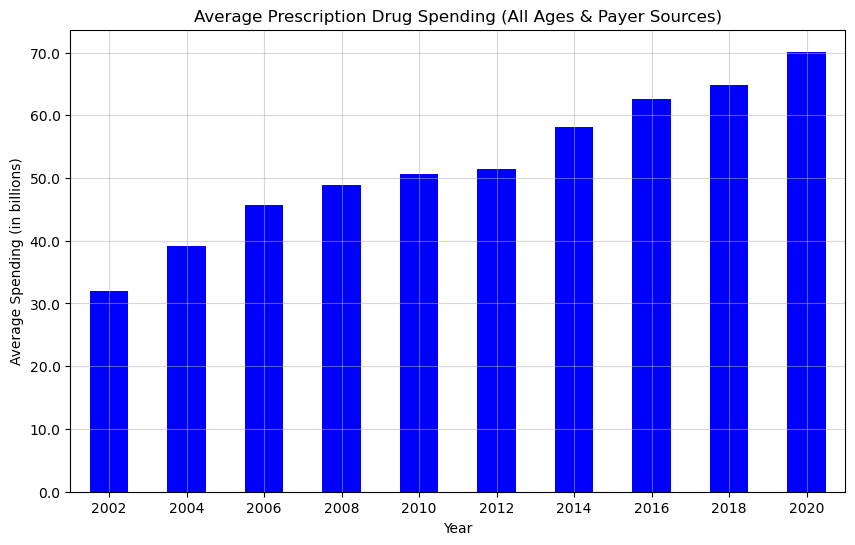

In [131]:
pres_mean_df.plot(kind="bar", figsize=(10,6), color="blue")
plt.title("Average Prescription Drug Spending (All Ages & Payer Sources)")
plt.xlabel("Year")
plt.ylabel("Average Spending (in billions)")
plt.grid(True, alpha=0.5)
plt.legend().remove()
plt.xticks(rotation=0, ha='center')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/drug_spending_mean.png")

plt.show()